In [96]:
#6 Bar charts with the RMSE of the different stations and different type. 
#  Code extension allows to easily switch the timeseries graph for any chosen station.
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime
%matplotlib inline

plt.style.use('seaborn-poster')


knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn3c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
fnfc3_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_2014'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n3c3 = os.path.join(path,'n3c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)
            flask_nfc3 = os.path.join(path,'nfc3',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n3c3_fh = nc.Dataset(flask_n3c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            flask_nfc3_fh = nc.Dataset(flask_nfc3,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn3c3_obs = np.append(fn3c3_obs,flask_n3c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            fnfc3_obs = np.append(fnfc3_obs,flask_nfc3_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n3c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()
            flask_nfc3_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    


temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'T_fnfc3_obs': fnfc3_obs*1000000,
                   'U_fn1c6_obs': fn1c6_obs*1000000,
                   'V_fn6c6_obs': fn6c6_obs*1000000,
                   'W_fndc6_obs': fndc6_obs*1000000,
                   'X_fn6c3_obs': fn6c3_obs*1000000,
                   'Y_fndc3_obs': fndc3_obs*1000000,
                   'Z_fn3c3_obs': fn3c3_obs*1000000},index=obs_num)  
#Select the timeframe to make the plots
#print(df[(df.I_obs_loc == 'alt')])
df = df[(df.G_date>'2014-01-01') & (df.G_date<'2015-01-01')]
df['G_date'] += pd.to_timedelta(np.around(df['F_lon']/15), unit='h')
df = df[(df.G_date.dt.hour >= 12) & (df.G_date.dt.hour <17)]
#print(df[(df.I_obs_loc == 'alt')])
#test_df=df
#test_df['G_date'] += pd.to_timedelta(np.around(test_df['F_lon']/15), unit='h')
#print(test_df['G_date'].dt.hour)
#print(test_df[(test_df.G_date.dt.hour > 12) & (test_df.G_date.dt.hour < 16)])
#print(test_df['G_date'].between_time('12:00','16:00'))


#print(df['H_obs_id'].value_counts())
#print(df['I_obs_loc'].value_counts())

#remove values with too high observations
df = df[df.A_fin_obs<500]
#calculate difference between models and observations and square it
df['J_TM5_offline'] = (df['B_fmp_obs']-df['A_fin_obs'])**2
df['K_TM5_n1c3'] = (df['C_fn1c3_obs']-df['A_fin_obs'])**2
df['L_TM5_n6c3'] = (df['X_fn6c3_obs']-df['A_fin_obs'])**2
df['M_TM5_ndc3'] = (df['Y_fndc3_obs']-df['A_fin_obs'])**2
df['N_TM5_n1c6'] = (df['U_fn1c6_obs']-df['A_fin_obs'])**2
df['O_TM5_n6c6'] = (df['V_fn6c6_obs']-df['A_fin_obs'])**2
df['P_TM5_ndc6'] = (df['W_fndc6_obs']-df['A_fin_obs'])**2
df['Q_TM5_n3c3'] = (df['Z_fn3c3_obs']-df['A_fin_obs'])**2
df['R_TM5_nfc3'] = (df['T_fnfc3_obs']-df['A_fin_obs'])**2

#calculation of RMSE for the types of measurements
#group the difference(column-J) by type and give the mean and the count, two dataframes, Offline and ESM
sample_type_off = df['J_TM5_offline'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n1c3 = df['K_TM5_n1c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n6c3 = df['L_TM5_n6c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_ndc3 = df['M_TM5_ndc3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n1c6 = df['N_TM5_n1c6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n6c6 = df['O_TM5_n6c6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_ndc6 = df['P_TM5_ndc6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n3c3 = df['Q_TM5_n3c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_nfc3 = df['R_TM5_nfc3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
#Merge the two dataframes together
pieces_type = [sample_type_off,sample_type_n1c3,sample_type_n3c3,sample_type_n6c3,sample_type_ndc3,sample_type_nfc3,sample_type_n1c6,sample_type_n6c6,sample_type_ndc6]
sample_type=pd.concat(pieces_type,keys=['TM5-Offline','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6'])
#Calculate the RMSE by giving the sqrt of the mean (mean was the square of the differences for each type)
sample_type['RMSE']=np.sqrt(sample_type['mean'])

sample_type_new = sample_type
sys.exit()

#calculation of RMSE of the different locations of measurement, see above for method
#Use only stations with 20 or more measurements
count_loc = df['I_obs_loc'].value_counts()
#count_loc[count_loc > 19]
df_loc = df[df['I_obs_loc'].isin(count_loc[count_loc > 9].index)]
sample_loc_off = df_loc['J_TM5_offline'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n1c3 = df_loc['K_TM5_n1c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n6c3 = df_loc['L_TM5_n6c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_ndc3 = df_loc['M_TM5_ndc3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n1c6 = df_loc['N_TM5_n1c6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n6c6 = df_loc['O_TM5_n6c6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_ndc6 = df_loc['P_TM5_ndc6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n3c3 = df_loc['Q_TM5_n3c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_nfc3 = df_loc['R_TM5_nfc3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
pieces_loc = [sample_loc_off,sample_loc_n1c3,sample_loc_n3c3,sample_loc_n6c3,sample_loc_ndc3,sample_loc_nfc3,sample_loc_n1c6,sample_loc_n6c6,sample_loc_ndc6]
sample_loc=pd.concat(pieces_loc,keys=['TM5-Offline','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6'])
sample_loc['RMSE']=np.sqrt(sample_loc['mean'])

#Plot the dataframes in barplots. First unstack them, keeping only the RMSE
plot_type=sample_type['RMSE'].unstack(level=0)
plot_type.index.name = '' #Setting the index name to '', otherwise the name is printed as label
ax1 = plot_type.plot.barh(figsize=(20,20),title='',fontsize=25,legend=False)
handles, labels = ax1.get_legend_handles_labels()
lgd=ax1.legend(handles[::-1], labels[::-1],loc='lower right', markerscale = 5,fontsize='35')
ax1.set_xlabel("RMSE",fontsize=25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
#plt.savefig('BBOS - RMSE_type.png',dpi=300)

plot_loc=sample_loc['RMSE'].unstack(level=0)
plot_loc.index.name = ''
ax2 = plot_loc.plot.barh(figsize=(20,80))
ax2.set_xlabel("RMSE")
plt.xlim(0,25)
#plt.savefig('RMSE_stations.png',dpi=300)
plt.show()

SystemExit: 

/Users/killaars/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


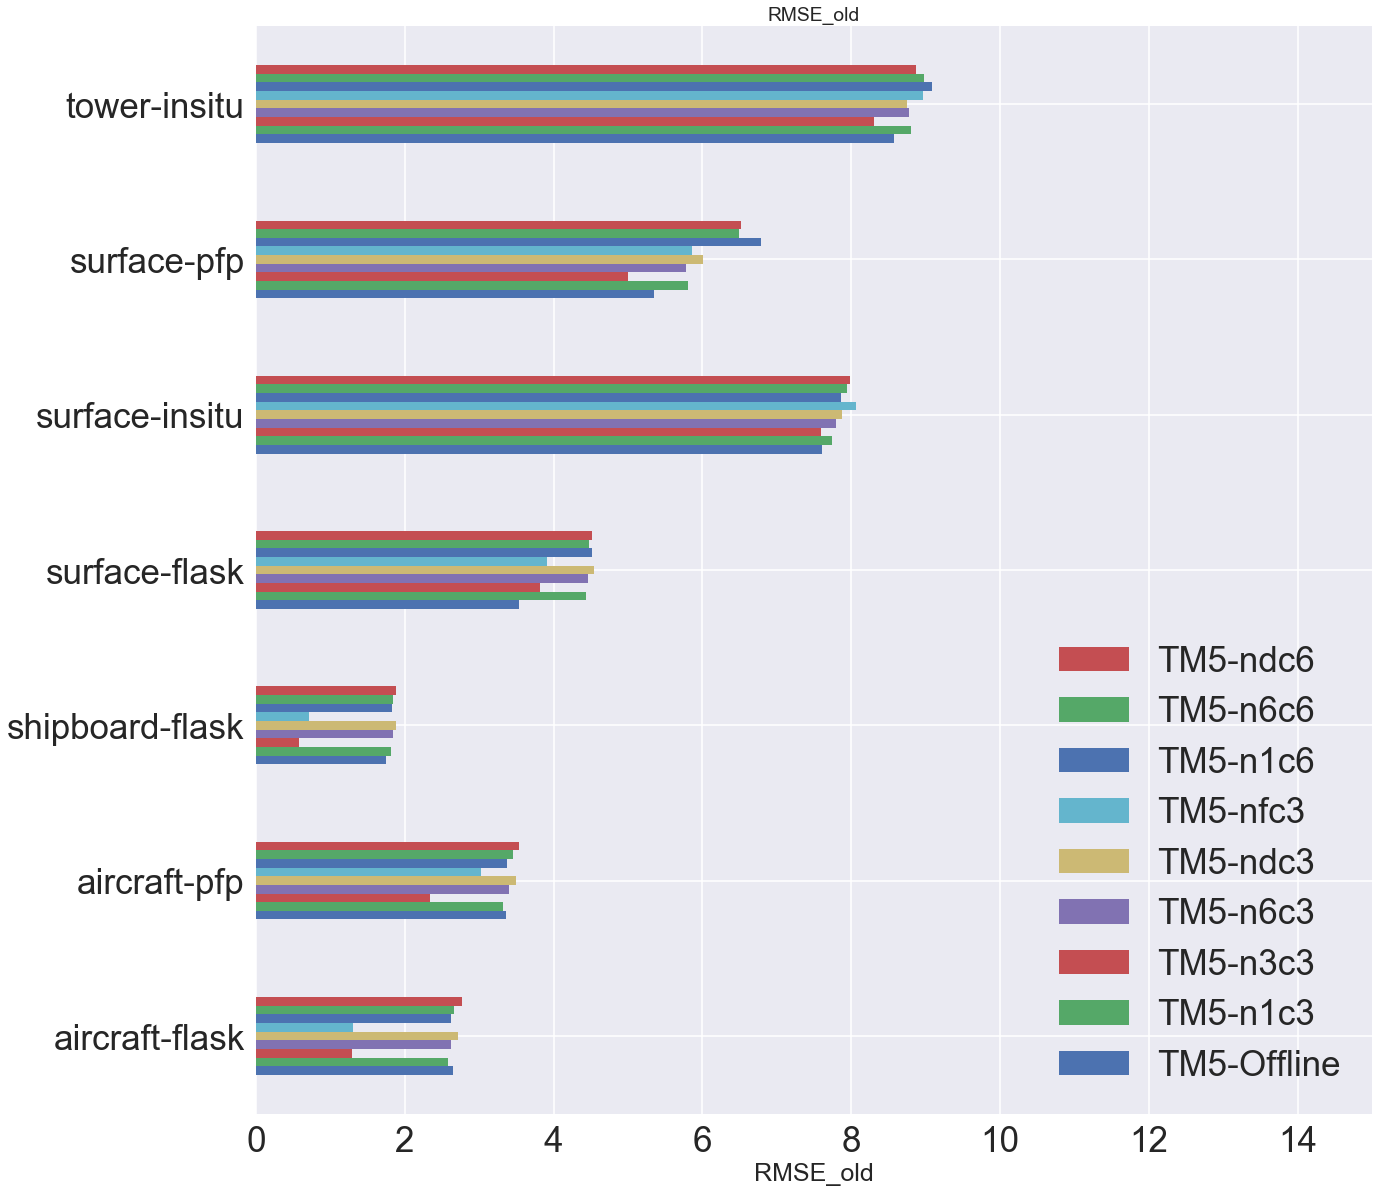

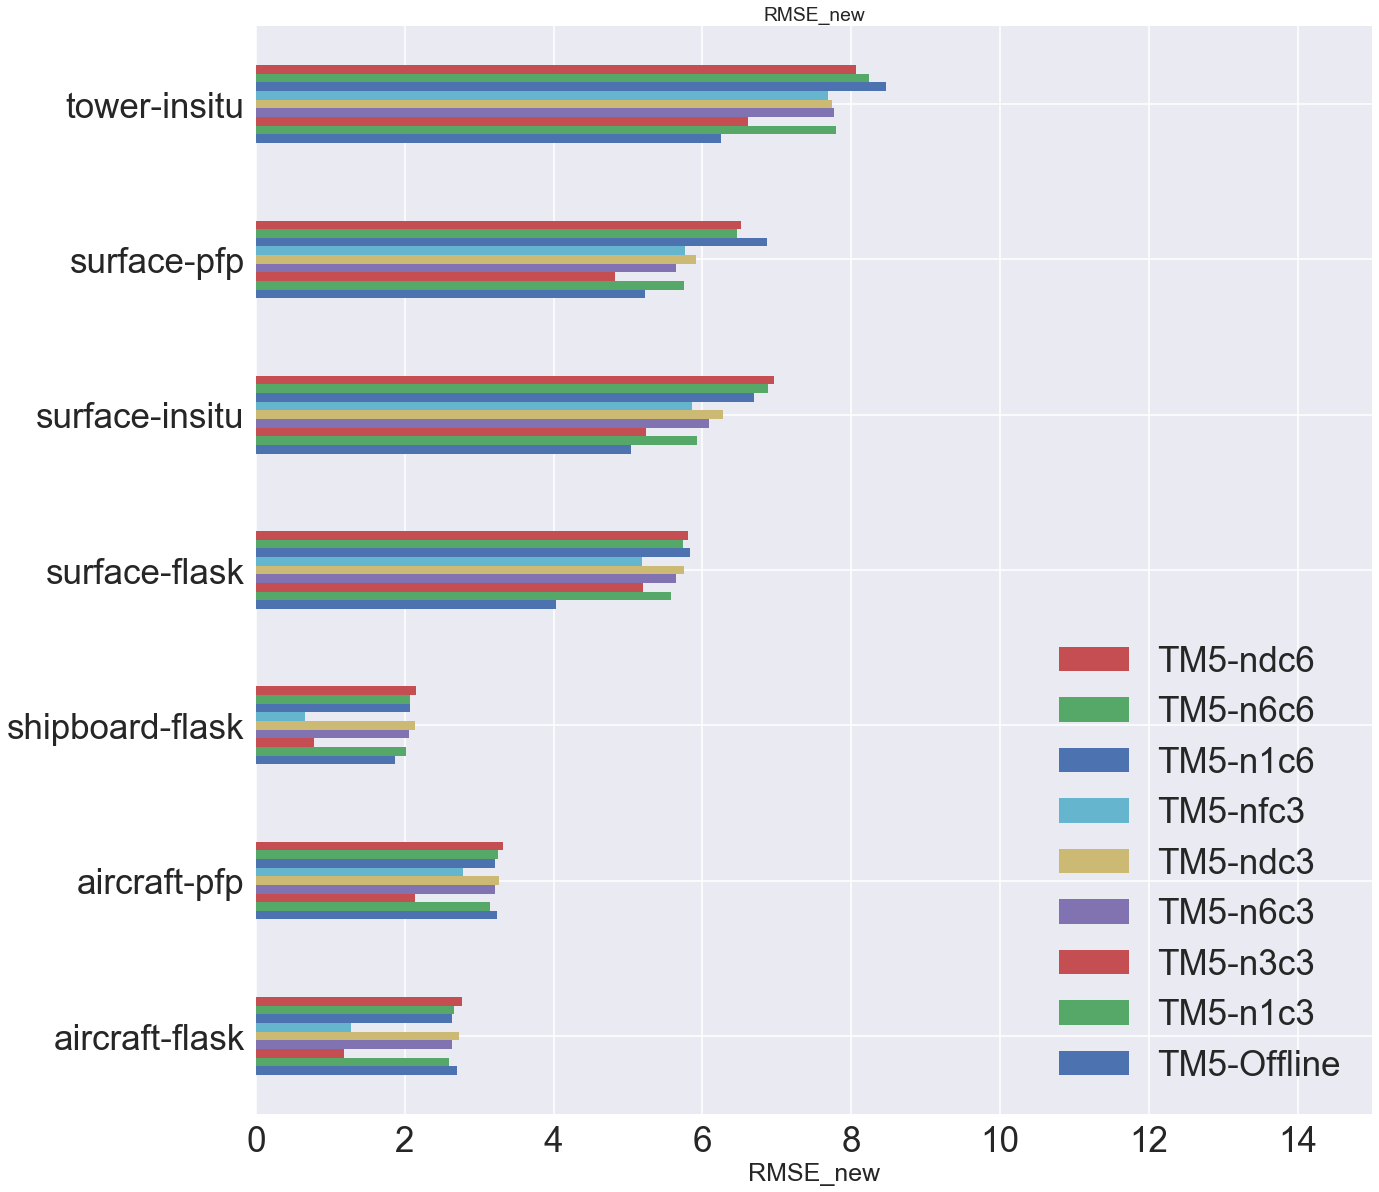

In [97]:
#print(sample_type_new)
#print(sample_type_old)

plot_type=sample_type_old['RMSE'].unstack(level=0)
plot_type.index.name = '' #Setting the index name to '', otherwise the name is printed as label
ax1 = plot_type.plot.barh(figsize=(20,20),title='RMSE_old',fontsize=35,legend=False)
handles, labels = ax1.get_legend_handles_labels()
lgd=ax1.legend(handles[::-1], labels[::-1],loc='lower right', markerscale = 5,fontsize='35')
ax1.set_xlabel("RMSE_old",fontsize=25)
ax1.set_xlim(0,15)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
    
plot_type=sample_type_new['RMSE'].unstack(level=0)
plot_type.index.name = '' #Setting the index name to '', otherwise the name is printed as label
ax2 = plot_type.plot.barh(figsize=(20,20),title='RMSE_new',fontsize=35,legend=False)
handles, labels = ax1.get_legend_handles_labels()
lgd=ax2.legend(handles[::-1], labels[::-1],loc='lower right', markerscale = 5,fontsize='35')
ax2.set_xlabel("RMSE_new",fontsize=25)
ax2.set_xlim(0,15)
for item in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(35)
plt.show()

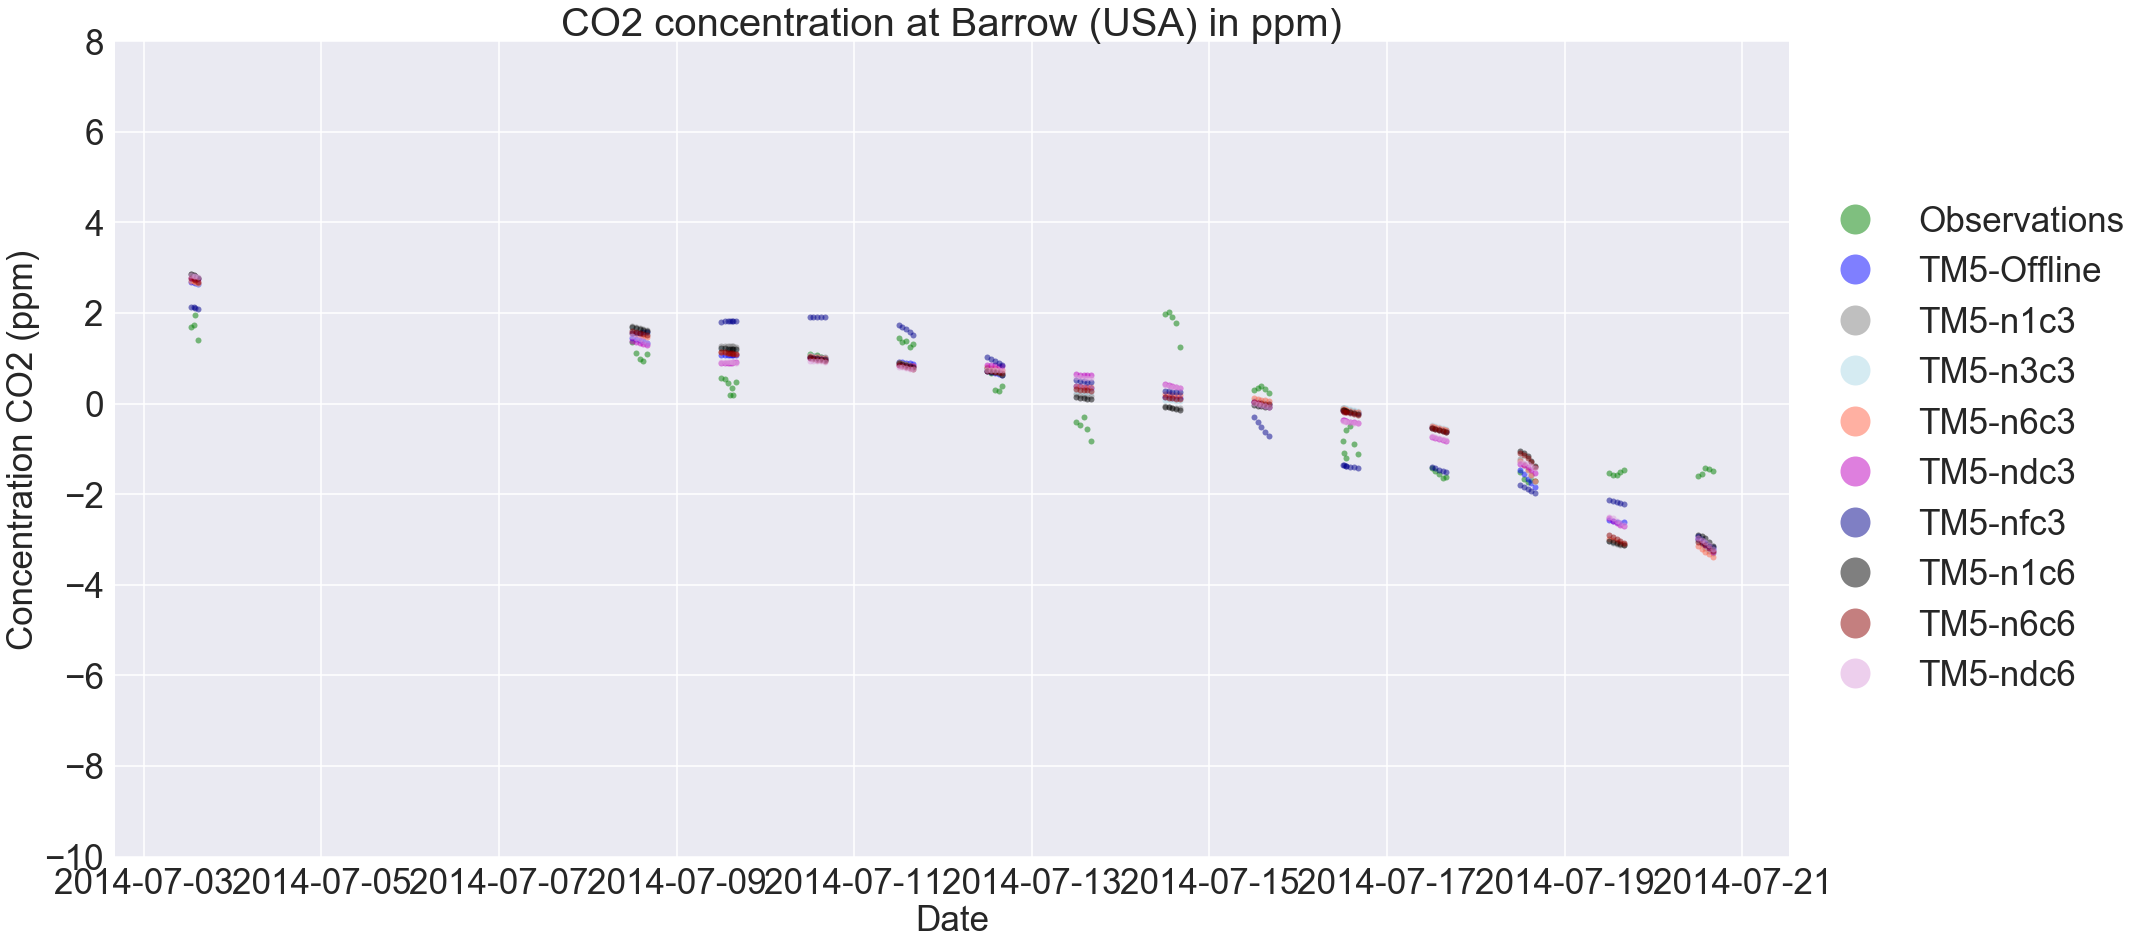

In [104]:
# Timeseries of chosen plot (comparable to figure 1), uses the data calculated by the previous block. 
# Can afterwards be run multiple times for chosen stations
df = df[(df.G_date>'2014-07-01') & (df.G_date<'2014-07-22')]
f, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(30, 15))
size = 6
alpha=.5
mask_loc = 'alt'
mask = (df.I_obs_loc==mask_loc)
ax1.set_title("CO2 concentration at Barrow (USA) in ppm)",fontsize=40)
ax1.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask]-df.A_fin_obs[mask].mean(), color='g', alpha=alpha, ms=size, label='Observations')
ax1.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask]-df.B_fmp_obs[mask].mean(), color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.plot_date(x=df.G_date[mask], y=df.C_fn1c3_obs[mask]-df.C_fn1c3_obs[mask].mean(), color='0.5', alpha=alpha, ms=size, label='TM5-n1c3')
ax1.plot_date(x=df.G_date[mask], y=df.Z_fn3c3_obs[mask]-df.Z_fn3c3_obs[mask].mean(), color='lightblue', alpha=alpha, ms=size, label='TM5-n3c3')
ax1.plot_date(x=df.G_date[mask], y=df.X_fn6c3_obs[mask]-df.X_fn6c3_obs[mask].mean(), color='tomato', alpha=alpha, ms=size, label='TM5-n6c3')
ax1.plot_date(x=df.G_date[mask], y=df.Y_fndc3_obs[mask]-df.Y_fndc3_obs[mask].mean(), color='m',alpha=alpha, ms=size, label='TM5-ndc3')
ax1.plot_date(x=df.G_date[mask], y=df.T_fnfc3_obs[mask]-df.T_fnfc3_obs[mask].mean(), color='darkblue',alpha=alpha, ms=size, label='TM5-nfc3')
ax1.plot_date(x=df.G_date[mask], y=df.U_fn1c6_obs[mask]-df.U_fn1c6_obs[mask].mean(), color='0', alpha=alpha, ms=size, label='TM5-n1c6')
ax1.plot_date(x=df.G_date[mask], y=df.V_fn6c6_obs[mask]-df.V_fn6c6_obs[mask].mean(), color='darkred', alpha=alpha, ms=size, label='TM5-n6c6')
ax1.plot_date(x=df.G_date[mask], y=df.W_fndc6_obs[mask]-df.W_fndc6_obs[mask].mean(), color='plum', alpha=alpha, ms=size, label='TM5-ndc6')

ax1.set_ylabel('Concentration CO2 (ppm)', fontsize=35)
ax1.set_xlabel('Date', fontsize=35)
ax1.set_ylim(-10,8)
lgd=ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale = 5,fontsize='35')
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
plt.show()

In [27]:
lon = np.arange(-180,181)
print(123/15)
print(0.2*60)
time=np.around(lon/15)
test=pd.DataFrame({'time' : time},index=lon)
print(test[:50])

8.2
12.0
      time
-180 -12.0
-179 -12.0
-178 -12.0
-177 -12.0
-176 -12.0
-175 -12.0
-174 -12.0
-173 -12.0
-172 -11.0
-171 -11.0
-170 -11.0
-169 -11.0
-168 -11.0
-167 -11.0
-166 -11.0
-165 -11.0
-164 -11.0
-163 -11.0
-162 -11.0
-161 -11.0
-160 -11.0
-159 -11.0
-158 -11.0
-157 -10.0
-156 -10.0
-155 -10.0
-154 -10.0
-153 -10.0
-152 -10.0
-151 -10.0
-150 -10.0
-149 -10.0
-148 -10.0
-147 -10.0
-146 -10.0
-145 -10.0
-144 -10.0
-143 -10.0
-142  -9.0
-141  -9.0
-140  -9.0
-139  -9.0
-138  -9.0
-137  -9.0
-136  -9.0
-135  -9.0
-134  -9.0
-133  -9.0
-132  -9.0
-131  -9.0
